In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from joblib import dump, load

import plotly.express as px

In [10]:
data_url = "https://raw.githubusercontent.com/digipodium/Datasets/main/diamond_pricing.csv"
df = pd.read_csv(data_url)

In [11]:
df.head()

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339


In [25]:
px.scatter_3d(df,x = "Paleonium",y ="Pressure",z="Price",color="Price")

In [17]:
# Feature selection (X, y) & Split into xtrain,xtest,ytrain,ytest
X = df[['Paleonium','Pressure']]
y = df['Price']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2, random_state=1)

In [18]:
# Algorithm instantiate and fit
model = DecisionTreeRegressor()
model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [19]:
# score and other metrics
print("score:", model.score(xtest,ytest) * 100)
pred = model.predict(X)
print("mse:",mean_squared_error(y,pred))
print("mae:",mean_absolute_error(y,pred))

score: 95.51528164304666
mse: 4167.438362286739
mae: 21.670640098556998


<AxesSubplot:ylabel='Density'>

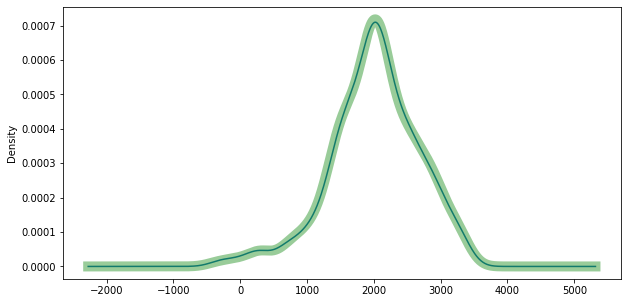

In [20]:
# visualization
df['p1'] = pred
ax = df['Price'].plot(kind='kde',figsize=(10,5))
df['p1'].plot(kind='kde',ax=ax,alpha=.4, color='green',linewidth=10)

<function matplotlib.pyplot.show(close=None, block=None)>

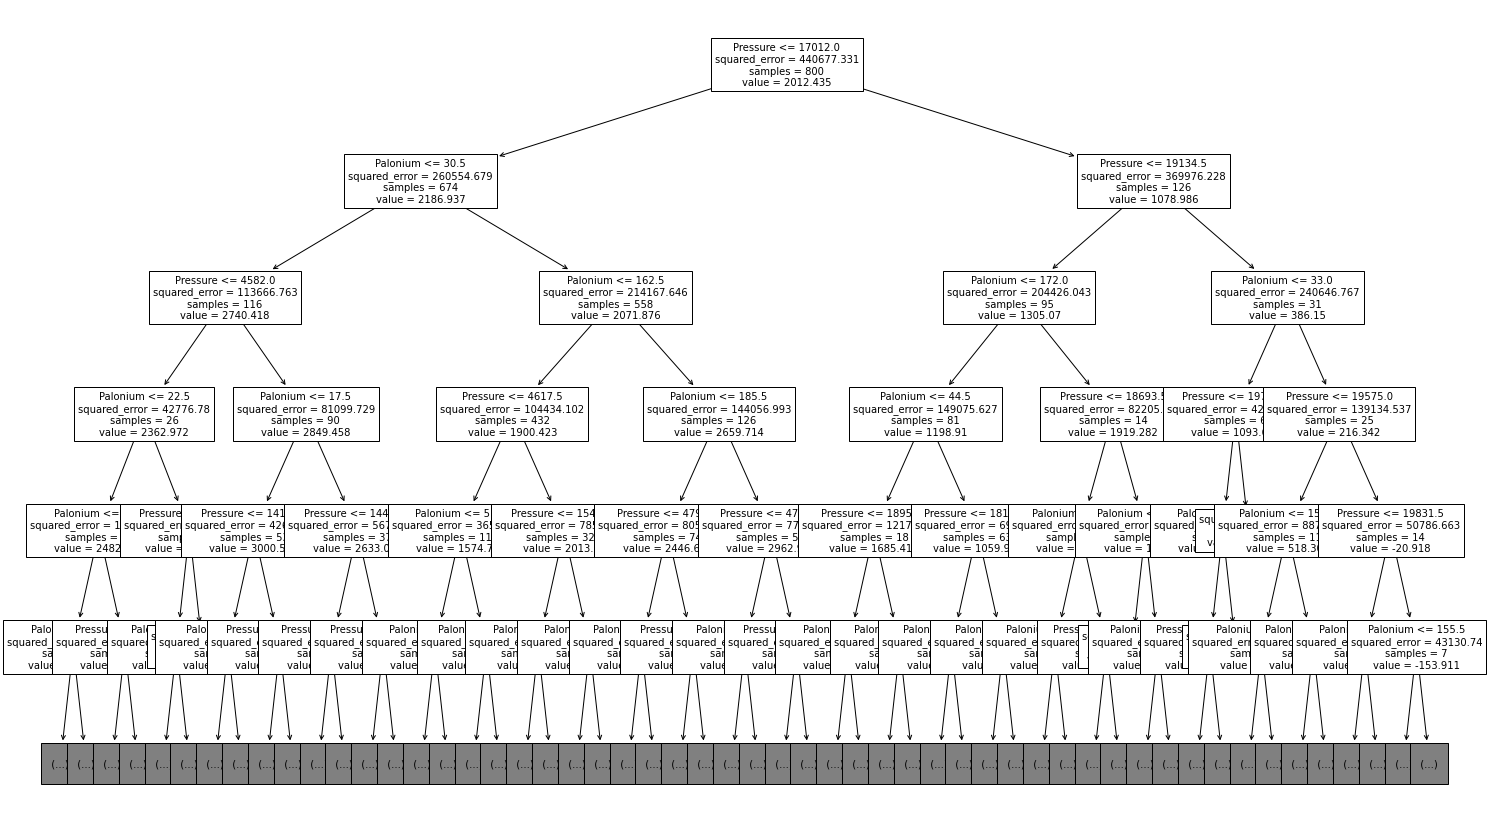

In [27]:
plt.figure(figsize=(25,15))
plot_tree(model,max_depth=5,fontsize=10,feature_names=["Palonium","Pressure"],)
plt.show

In [21]:
df.head()

,Paleonium,Pressure,Price,p1
0,17,6567,2810.280298,2810.280298
1,59,5253,1986.967089,1986.967089
2,123,9715,2083.132087,2005.562132
3,182,2073,2236.340285,2370.793424
4,133,6400,1903.323339,1903.323339


In [22]:
dump(model,"basic_diamond_pricing.pkl")

['basic_diamond_pricing.pkl']